In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Tour de France <br>
<p>Let's take a look at the history of the most pretigious cycling race in the world, from 1903 to 2017:</p>
<p>Brief overview of what our data looks like:</p>

In [2]:
tour_data = pd.read_csv('stages_TDF.csv', sep = ',')
tour_data.head(15)

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual time trial,Geraint Thomas,GBR
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat stage,Marcel Kittel,GER
2,3,2017-07-03,212.5,Verviers,Longwy,Medium mountain stage,Peter Sagan,SVK
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat stage,Arnaud Démare,FRA
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Medium mountain stage,Fabio Aru,ITA
5,6,2017-07-06,216.0,Vesoul,Troyes,Flat stage,Marcel Kittel,GER
6,7,2017-07-07,213.5,Troyes,Nuits-Saint-Georges,Flat stage,Marcel Kittel,GER
7,8,2017-07-08,187.5,Dole,Station des Rousses,Medium mountain stage,Lilian Calmejane,FRA
8,9,2017-07-09,181.5,Nantua,Chambéry,High mountain stage,Rigoberto Urán,COL
9,10,2017-07-11,178.0,Périgueux,Bergerac,Flat stage,Marcel Kittel,GER


<p>Quick look at our column names and types:</p>

In [3]:
tour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stage           2236 non-null   object 
 1   Date            2236 non-null   object 
 2   Distance        2236 non-null   float64
 3   Origin          2236 non-null   object 
 4   Destination     2236 non-null   object 
 5   Type            2236 non-null   object 
 6   Winner          2236 non-null   object 
 7   Winner_Country  2184 non-null   object 
dtypes: float64(1), object(7)
memory usage: 139.9+ KB


<p>Running describe just to see what I can:</p>

In [4]:
tour_data.describe()

,Distance
count,2236.000000
mean,196.782994
std,90.176385
min,1.000000
25%,156.000000
50%,199.000000
75%,236.000000
max,482.000000


### Data Cleaning <br>
<p>First I want to clear out any Null/NA/no info cells I can find, I will check to see what is missing and then go from there</p>

In [5]:
# Maybe clear out the null/NA/no info
# First lets see how many
tour_data.isnull().sum()
tour_data[tour_data['Winner_Country'].isnull()]

# all of that is basically team time trials or cancelled events

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country
50,9,2015-07-12,28.0,Vannes,Plumelec,Team time trial,BMC Racing Team,NaN
87,4,2013-07-02,25.0,Nice,Nice,Team time trial,Orica–GreenEDGE,NaN
127,2,2011-07-03,23.0,Les Essarts,Les Essarts,Team time trial,Garmin–Cervélo,NaN
171,4,2009-07-07,39.0,Montpellier,Montpellier,Team time trial,Astana,NaN
255,4,2005-07-05,67.5,Tours,Blois,Team time trial,Discovery Channel,NaN
319,4,2002-07-10,67.5,Épernay,Château-Thierry,Team time trial,ONCE–Eroski,NaN
341,5,2001-07-12,67.0,Verdun,Bar-le-Duc,Team time trial,Crédit Agricole,NaN
360,4,2000-07-04,70.0,Nantes,Saint-Nazaire,Team time trial,ONCE–Deutsche Bank,NaN
416,17,1998-07-29,149.0,Albertville,Aix-les-Bains,Stage with mountain(s),—,NaN
468,3,1995-07-04,67.0,Mayenne,Alençon,Team time trial,Gewiss–Ballan,NaN


<p>Because the only data missing was the winning country in team time trial events, I decided to leave that be. </p><p>Next I want to wrangle the data I do have. The things that jump out is the formatting of the date isn't very useful and the standardizing of stage types has changed over time. For the date I want to pull the year out so I can group by it easier, at this time I don't need the month or day. I am also going to go through and format the stage types. Modern stage types are flat, hilly, mountain, and time trial. I will add team time trial and other to catch those that don't fall into current delineations. This will make stage types more easily understandable and more workable. Outside of these two issues nothing else is jumping out as a concern, I will reassess as I go.</p>

In [6]:
# Cleaning Data methods
# Pulling year for grouping
def get_year(race_date):
    l_date = race_date.split("-")
    return int(l_date[0])

year_list = []
for race in tour_data["Date"]:
    year_list.append(get_year(race))
tour_data["Year"] = year_list

# Stage Types
# Combining stage types into more useful groups

def group_stage(stage):
    if stage in ['Flat Stage', 'Flat cobblestone stage', 'Flat stage', 'Plain stage', 'Plain stage with cobblestones']:
        return "Flat Stage"
    elif stage in ['High mountain stage', 'Medium mountain stage', 'Mountain Stage', 'Mountain stage', 'Stage with mountain', 'Stage with mountain(s)']:
        return "Mountain Stage"
    elif stage in ['Hilly stage']:
        return "Hilly Stage"
    elif stage in ['Individual time trial', 'Mountain time trial']:
        return "Individual Time Trial"
    elif stage in ['Team time trial']:
        return "Team Time Trial"
    else:
        return "Other Type Stage"
    
type_list = []
for race in tour_data["Type"]:
    type_list.append(group_stage(race))
tour_data["Type"] = type_list

tour_data.head(20)

,Stage,Date,Distance,Origin,Destination,Type,Winner,Winner_Country,Year
0,1,2017-07-01,14.0,Düsseldorf,Düsseldorf,Individual Time Trial,Geraint Thomas,GBR,2017
1,2,2017-07-02,203.5,Düsseldorf,Liège,Flat Stage,Marcel Kittel,GER,2017
2,3,2017-07-03,212.5,Verviers,Longwy,Mountain Stage,Peter Sagan,SVK,2017
3,4,2017-07-04,207.5,Mondorf-les-Bains,Vittel,Flat Stage,Arnaud Démare,FRA,2017
4,5,2017-07-05,160.5,Vittel,La Planche des Belles Filles,Mountain Stage,Fabio Aru,ITA,2017
5,6,2017-07-06,216.0,Vesoul,Troyes,Flat Stage,Marcel Kittel,GER,2017
6,7,2017-07-07,213.5,Troyes,Nuits-Saint-Georges,Flat Stage,Marcel Kittel,GER,2017
7,8,2017-07-08,187.5,Dole,Station des Rousses,Mountain Stage,Lilian Calmejane,FRA,2017
8,9,2017-07-09,181.5,Nantua,Chambéry,Mountain Stage,Rigoberto Urán,COL,2017
9,10,2017-07-11,178.0,Périgueux,Bergerac,Flat Stage,Marcel Kittel,GER,2017


### Investigations <br>
<p>Now with my data more effectively set up I wanted to get into the investigating questions I want answered. As stated above I watch the tour annually and used my more general knowledge of the sport and race to help guide my questioning. I know the tour has changed drastically over time but how so. What follows is those hypothesis and explorations.</p>

<b> Question 1: </b>
<p> The tour is known currently for being a month long, usually 21 stages. How did that number change over time? My hypothesis was that the number increased relatively regularly over time and then settled in the early 2000's to 21.</p>

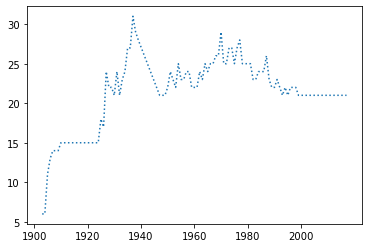

In [7]:
# Group by years, count of stages
yr_st_count = tour_data.groupby(['Year']).count()
# yr_st_count

# Make a histogram or line graph, lets see that visually
plt.plot(yr_st_count['Stage'], linestyle = 'dotted')
plt.xticks(np.arange(1900, 2020, 20))
plt.show()

<p> As we can see pretty immediately after the tour began the amount of stages began to increase, with a peak in the late 1930s. Again in the 70s there was a push for increased stage counts, but it settles in the 1990's at 21 stages.</p><p></p>
<b> Question 2: </b>
<p> The Tour cycling races are known for being pretty long. But how has tour total distance? My hypothesis was that total distance for the tour has increased over time, seeing the spikes in stage numbers above, I expect the distance to spike similarly.</p>

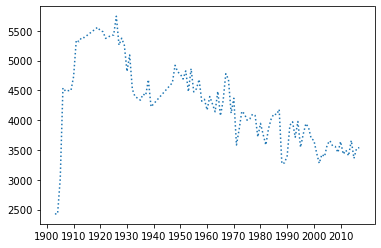

In [8]:
# How has the tour distance changed over time?
yr_st_sum = tour_data.groupby(['Year']).sum()
# yr_st_sum.head()
# Group by years
plt.plot(yr_st_sum['Distance'], linestyle = 'dotted')
plt.xticks(np.arange(1900, 2020, 10))
plt.show()
# sum of distance

# Make a histogram or line graph

<p> Contrary to my assumption the total distance for the tour has largely decreased over time, with the max total distance in the mid 1920s, and then decreasing until the 2000s when the distance has become more regularly in roughly 3500 km.</p><p></p>
<b> Question 3: </b>
<p> How has this affected the average stage distance? Now having seen the number of stages increase while total distance decreased I assume the average stage distance has also decreased.</p>

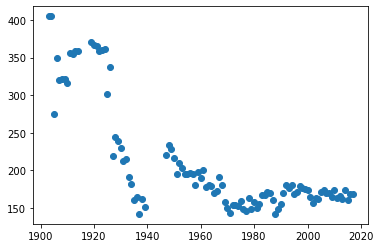

In [9]:
# Average stage distance? Over time?
yr_st_mean = tour_data.groupby(['Year']).mean()
yr_st_mean.head()
# Group by years

# sum of distance

# Make a histogram or line graph
plt.scatter(yr_st_mean.index.values, yr_st_mean['Distance'])
plt.show()
# Get trend line in R

<p> It makes sense after looking at both the decrease in total distance over time and relative increase in number of stages that overall there was a sharp decrease in average stage length, bottoming out in the late 1930s, and then steadying in the 1970s to the present at about 175km per stage.</p><p></p>
<b> Question 4: </b>
<p> As we saw in the data wrangling poriton the way stage types are defined has changed slightly over time, what type of stage is most common and when were each introduced. I assume flat stages are most common and I believe Team Time Trials were the last introduced and most uncommon.</p>

In [10]:
#Years of first (maybe last) introduction:
#flat
flat_stages = tour_data[tour_data['Type'] == 'Flat Stage']
flat_stages.sort_values(by = "Year")
#First introduced in 1903, last used in 2017

#hilly
hilly_stages = tour_data[tour_data['Type'] == 'Hilly Stage']
hilly_stages.sort_values(by = "Year")
#First introduced in 1972, last used in 2006

#mountain
moun_stages = tour_data[tour_data['Type'] == 'Mountain Stage']
moun_stages.sort_values(by = "Year")
#First introduced in 1903, last used in 2017

#ITT
itt_stages = tour_data[tour_data['Type'] == 'Individual Time Trial']
itt_stages.sort_values(by = "Year")
#First introduced in 1934, last used in 2017

#TTT
ttt_stages = tour_data[tour_data['Type'] == 'Team Time Trial']
ttt_stages.sort_values(by = "Year")
#First introduced in 1927, last used in 2015

# Number of stage types?
ty_st_count = tour_data.groupby(['Type']).count()

ty_yr_st_count = tour_data.groupby(['Year', 'Type']).count()
ty_yr_st_count.tail(10)
ty_st_count.head(10)

,Stage,Date,Distance,Origin,Destination,Winner,Winner_Country,Year
Type,,,,,,,,
Flat Stage,1175,1175,1175,1175,1175,1175,1174,1175
Hilly Stage,76,76,76,76,76,76,76,76
Individual Time Trial,218,218,218,218,218,218,218,218
Mountain Stage,668,668,668,668,668,668,665,668
Other Type Stage,12,12,12,12,12,12,12,12
Team Time Trial,87,87,87,87,87,87,39,87


<p> Flat stages are the most common stage type by far, hilly stage types were added last in 1972 and are the least common stage type.</p><p></p>
<b> Question 5: </b>
<p> I assume that flat stages are the longest and individual time trials are shortest but let's verify!</p>

In [11]:
# stage type v average distance
ty_st_count = tour_data.groupby(['Type']).mean()
ty_st_count[['Distance']]


,Distance
Type,
Flat Stage,222.665787
Hilly Stage,196.328947
Individual Time Trial,39.482454
Mountain Stage,215.687275
Other Type Stage,148.500000
Team Time Trial,103.278161


<p> The difference between flat and mountain stage average distance was not as long as assumed, with flat stages on average only 7 km longer than mountain stages. Individual time trials are the shortest stage type by far, less than half the distance of even the team time trial stage type.</p><p></p>
<b> Question 6: </b>
<p> The actual path of the Tour has changed every year since it's creation, what cities are the most popular tour hotspots. I know that Paris a classic spot for finishing the tour, but I don't know where would be the most popular city to begin the tour. </p>

In [12]:
# Popular cities? I know Paris but others?

# count of origin
ocity_counts = tour_data.groupby(["Origin"]).count()
ocity_counts.sort_values(by = ['Stage'], ascending = False).head(10)
#I thought Paris was #1 but its not!!
first_ocity = tour_data[tour_data['Stage'] == '1'].groupby(['Origin']).count()
first_ocity.sort_values(by = 'Stage', ascending = False)

# count of destinations
dcity_counts = tour_data.groupby(["Destination"]).count()
dcity_counts.sort_values(by = ['Stage'], ascending = False).head(10)
#Paris is the #1 destination but not origin


cityab_counts = tour_data.groupby(["Origin", "Destination"]).count()
cityab_counts.sort_values(by = ['Stage'], ascending = False).head(10)
#Pau to Bordeaux has been a stage 18 times!


,,Stage,Date,Distance,Type,Winner,Winner_Country,Year
Origin,Destination,,,,,,,
Pau,Bordeaux,18,18,18,18,18,18,18
Luchon,Perpignan,17,17,17,17,17,17,17
Strasbourg,Metz,13,13,13,13,13,13,13
Pau,Luchon,12,12,12,12,12,12,12
Bayonne,Luchon,12,12,12,12,12,12,12
Bordeaux,Bayonne,12,12,12,12,12,12,12
Caen,Paris,12,12,12,12,12,12,12
Cherbourg,Brest,10,10,10,10,10,10,10
Dunkerque,Paris,10,10,10,10,10,10,10


<p> In 104 years of the tour taking place, 62 of those have stages beginning in Pau, France and 108 of which finish in Paris, France. Paris is also the most popular city to begin the Tour de France. The most common City to City route is Pau to Bordeaux which has been in 18 of the 104 Tours. </p><p></p>
<b> Question 7: </b>
<p> I want to take a deeper dive into the country of the winners, I assume most are from France or adjacent countries but are some teams better at mountain climbing? Let's find out.</p>

In [13]:
# Stage types vs country of winner? Are french people that good at climbing

tour_data.groupby(['Winner_Country']).count().sort_values(by = 'Stage', ascending = False).head(10)
# The most Tour de France winners are from France, which makes sense 
non_french = tour_data[tour_data['Winner_Country'] != 'FRA']
non_french.tail()
# The first non-French stage winner was from Switzerland in 1903

#lets look at stage types
#flat - French, then Belgian, then Italian
wc_flat = flat_stages.groupby(['Winner_Country']).count()
wc_flat.sort_values(by = 'Stage', ascending = False).head()
#mountain - French, then Belgian, then Italian
wc_moun = moun_stages.groupby(['Winner_Country']).count()
wc_moun.sort_values(by = 'Stage', ascending = False).head()
#hilly - French, then Belgian, then Netherlands
wc_hilly = hilly_stages.groupby(['Winner_Country']).count()
wc_hilly.sort_values(by = 'Stage', ascending = False).head()
#itt - French, then Belgian, then Spain
wc_itt = itt_stages.groupby(['Winner_Country']).count()
wc_itt.sort_values(by = 'Stage', ascending = False).head()
#ttt - Beglium, then France, then Luxembourg (Not the best data, we dont have Average Countries but just to see)
wc_ttt = ttt_stages.groupby(['Winner_Country']).count()
wc_ttt.sort_values(by = 'Stage', ascending = False).head()


,Stage,Date,Distance,Origin,Destination,Type,Winner,Year
Winner_Country,,,,,,,,
BEL,18,18,18,18,18,18,18,18
FRA,15,15,15,15,15,15,15,15
LUX,4,4,4,4,4,4,4,4
USA,2,2,2,2,2,2,2,2


<p> It makes sense that in the Tour de France, the French have won the most number of times. It was interesting to find that the first non-French stage win was in 1903, from Switzerland. The majority of winners are still European but both The Tour and cycling have become more and more diverse over time. It will be interesting to see how the country of winners of the Tour continues to change in the future.</p><p></p>
<b> Question 8: </b>
<p> The most famous name Americans know in cycling is unfortunately Lance Armstrong who had several Tour wins stripped due to the use of performance enhancers, however Armstrong is not the end all be all of high Tour performance. Who has the most stage wins? I do not remember the record holder as of 2017, but I would guess that Cavendish is in the top 5-10.</p>

In [14]:
# Most stages won

win_count = tour_data.groupby(['Winner']).count()
win_count.sort_values(by = 'Stage', ascending = False).head(10)

# chart, maybe make it look like a podium

,Stage,Date,Distance,Origin,Destination,Type,Winner_Country,Year
Winner,,,,,,,,
Eddy Merckx,34,34,34,34,34,34,34,34
Mark Cavendish,30,30,30,30,30,30,30,30
Bernard Hinault,28,28,28,28,28,28,28,28
André Leducq,24,24,24,24,24,24,24,24
André Darrigade,22,22,22,22,22,22,22,22
Nicolas Frantz,20,20,20,20,20,20,20,20
Lance Armstrong[n 1],20,20,20,20,20,20,20,20
François Faber,18,18,18,18,18,18,18,18
Jean Alavoine,17,17,17,17,17,17,17,17


<p> Eddy Merckx has the most stage wins at 34. Even with the stripping, Lance Armstrong is still in the top 10 most stage wins at 20. My guess of Cavendish was correct, he was holder of the second most stage wins at 30. </p><p></p>
<b> Question 9: </b>
<p> In investigating stage distance changes and stage type distances I wanted to see the winner of the most kilometers so to speak. I assume many of the top ten stage winners will have the the most distance won, but time trials will affect this number.</p>

In [15]:
# Winner v stage distance?

# Group by winner
# Sum of distance
winner_dist = tour_data.groupby(["Winner"]).sum()
winner_dist.sort_values(by = 'Distance', ascending = False).head(10)

# chart of top 5 to compare? maybe againt Stage #

,Distance,Year
Winner,,
Jean Alavoine,5965.0,32598
François Faber,5855.0,34379
Nicolas Frantz,5648.0,38531
Mark Cavendish,5557.0,60332
André Leducq,5436.0,46322
André Darrigade,4501.0,43100
Philippe Thys,4089.0,23041
Louis Trousselier,3974.0,22875
Eddy Merckx,3441.9,67032


<p> You can see that both stage type and year of racing likely affected the summed distance of wins. For the top 2 of our previous podium you can see that Merckx who raced in the 70s, he likely won more time trials or shorter stages, while Cavendish for being a modern rider (thus shorter stages), he tends to win longer stages.</p><p></p>
<b> Question 10: </b>
<p> The last breakdown I want to see spawned from the distance discussion above, I want to see who our top performers are by stage type.</p>

In [16]:
# Winner v stage types

# Group by winner
# Count of type
win_type = tour_data.groupby(["Winner", "Type"]).count()
win_type.sort_values(by = "Stage", ascending = False)

# compare against reverse, group by type, count of winner

type_leaderboards = tour_data.groupby(['Type', 'Winner']).count()
type_leaderboards.sort_values(by = "Stage", ascending = False).head(30)

#individual breakdown
#flat - Cavendish, then Darrigade, then Kittel
w_flat = flat_stages.groupby(['Winner']).count()
w_flat.sort_values(by = 'Stage', ascending = False).head()
#mountain - Merckx, then Faber, then Bartali
w_moun = moun_stages.groupby(['Winner']).count()
w_moun.sort_values(by = 'Stage', ascending = False).head()
#hilly - Ludderding, then Jalabert, then van Poppel
w_hilly = hilly_stages.groupby(['Winner']).count()
w_hilly.sort_values(by = 'Stage', ascending = False).head(20)
#itt - Hinault, then Merckx, then Anquetil
w_itt = itt_stages.groupby(['Winner']).count()
w_itt.sort_values(by = 'Stage', ascending = False).head()

# Show our top jersey winners, mountain, sprint

,Stage,Date,Distance,Origin,Destination,Type,Winner_Country,Year
Winner,,,,,,,,
Bernard Hinault,20,20,20,20,20,20,20,20
Eddy Merckx,16,16,16,16,16,16,16,16
Jacques Anquetil,11,11,11,11,11,11,11,11
Lance Armstrong[n 1],11,11,11,11,11,11,11,11
Miguel Indurain,10,10,10,10,10,10,10,10


<p>As I hypothesized with the last question, 30 of Cavendish's wins are from flat stages while Merckx got 13 of his wins on Mountain stages.</p><p></p>

### Conclusions <br>
<p> The Tour has evolved drastically over time, looking at the stages from 1903 to 2017 you can see some of those changes.When looking at the structure of the race we see the 21 stage, 3 week, beast of a race come to be as in many ways the race has settled and standardized in the last 20 years. Similarly in the history of stage winners we see quasi stage-type-specialists like Cavendish in the more modern races. </p>

In [17]:
tour_data.to_csv('edited_tour_data.csv')